In [41]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd /content/gdrive/My Drive/Elianna/HousePrice_Kaggle/Kaggle-House-Price-ML

/content/gdrive/My Drive/Elianna/HousePrice_Kaggle/Kaggle-House-Price-ML


In [111]:
#libraries we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
pd.options.mode.chained_assignment = None

In [113]:
train = pd.read_csv('./house-prices-data/train.csv') 
test = pd.read_csv('./house-prices-data/test.csv')

In [114]:
# Drop the id column
train.drop(['Id'],axis=1, inplace=True)
test.drop(['Id'],axis=1, inplace=True)

In [115]:
print('The shape of train data is {}'.format(train.shape))
print('The shape of test data is {}'.format(test.shape))

The shape of train data is (1460, 80)
The shape of test data is (1459, 79)


In [116]:
full = train.append(test, ignore_index=True)

In [117]:
print('The shape of full data is {}'.format(full.shape))

The shape of full data is (2919, 80)


In [118]:
full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


### Cleaning Data Set


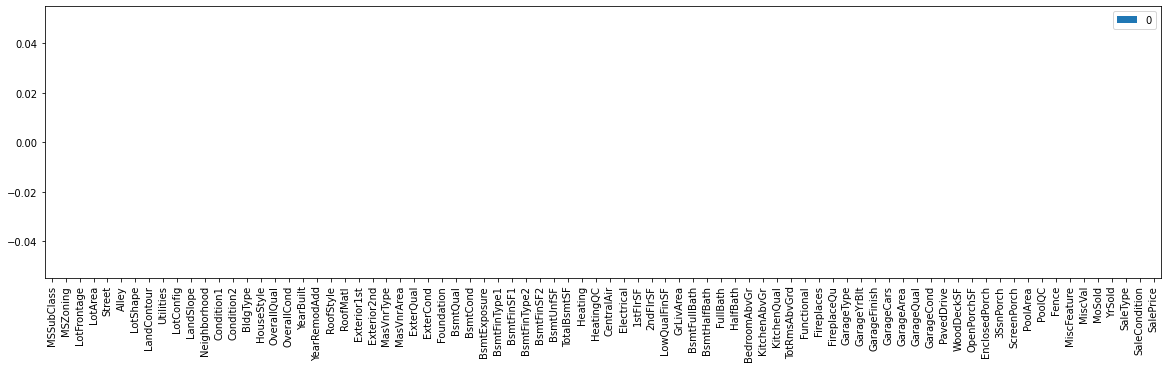

In [131]:
pd.DataFrame(train.isna().sum()*100/train.shape[0]).plot.bar(figsize=(20,5))

* For the variables with huge proportion of missing value: Alley, PoolQC, Fence and MiscFeature, it's proper to replace NA value with None. Since None is also a type
* Replaced null values with None in the FireplaceQu column both in test and training set.

In [120]:
# Get columns to fill missing column with Null
columns_fill_null = full.columns[full.isnull().any(axis = 0)].drop(['LotFrontage', 'SalePrice', "MasVnrArea", "GarageYrBlt"])

In [122]:
full[columns_fill_null] = full[columns_fill_null].fillna("None")
full['MasVnrArea'] = full['MasVnrArea'].fillna(0)
full['GarageYrBlt'] = full['GarageYrBlt'].fillna(full['YearBuilt'])

In [123]:
train = full[full['SalePrice'].notnull()]
test = full[full['SalePrice'].isnull()]

In [124]:
# Get train LotFrontage dummy variables
LotFrontage_Dummies_df = pd.get_dummies(train[['LotFrontage', 'MSZoning', 'LotArea', 'LotConfig', 'Neighborhood']])

# Get full dummy variables
# Split the data into LotFrontage known and LotFrontage unknown
LotFrontageKnown = LotFrontage_Dummies_df[LotFrontage_Dummies_df["LotFrontage"].notnull()]
LotFrontageUnknown = LotFrontage_Dummies_df[LotFrontage_Dummies_df["LotFrontage"].isnull()]

# Training data knowing LotFrontage
LotFrontage_Known_X = LotFrontageKnown.drop(["LotFrontage"], axis = 1)
LotFrontage_Known_y = LotFrontageKnown["LotFrontage"]
# Training data unknown LotFrontage
LotFrontage_Unknown_X = LotFrontageUnknown.drop(["LotFrontage"], axis = 1)
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)
rfr.fit(LotFrontage_Known_X, LotFrontage_Known_y)
rfr.score(LotFrontage_Known_X, LotFrontage_Known_y)

0.9305840449585167

In [125]:
# Predict training data unknown LotFrontage
LotFrontage_Unknown_y = rfr.predict(LotFrontage_Unknown_X)
train.loc[train["LotFrontage"].isnull(), "LotFrontage"] = LotFrontage_Unknown_y

In [128]:
# Repeat same process for test data
# Get train LotFrontage dummy variables
LotFrontage_Dummies_df = pd.get_dummies(test[['LotFrontage', 'MSZoning', 'LotArea', 'LotConfig', 'Neighborhood']])

# Get full dummy variables
# Split the data into LotFrontage known and LotFrontage unknown
LotFrontageKnown = LotFrontage_Dummies_df[LotFrontage_Dummies_df["LotFrontage"].notnull()]
LotFrontageUnknown = LotFrontage_Dummies_df[LotFrontage_Dummies_df["LotFrontage"].isnull()]

# Testing data knowing LotFrontage
LotFrontage_Known_X = LotFrontageKnown.drop(["LotFrontage"], axis = 1)
LotFrontage_Known_y = LotFrontageKnown["LotFrontage"]
# Testing data unknown LotFrontage
LotFrontage_Unknown_X = LotFrontageUnknown.drop(["LotFrontage"], axis = 1)
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)
rfr.fit(LotFrontage_Known_X, LotFrontage_Known_y)
rfr.score(LotFrontage_Known_X, LotFrontage_Known_y)

0.9453821292425812

In [130]:
# Predict testing data unknown LotFrontage
LotFrontage_Unknown_y = rfr.predict(LotFrontage_Unknown_X)
test.loc[test["LotFrontage"].isnull(), "LotFrontage"] = LotFrontage_Unknown_y

## Converting year built into age

In [ ]:
currentYear = datetime.now().year

* Converting a few columns such as Year Built and Year Remod added into the age as per current date. 
* The following columns make no contribution regarding the sales price ,so we can drop it. 

 - MoSold : Month Sold (MM)

 - YrSold: Year Sold (YYYY)

 - SaleType: Type of sale

 - SaleCondition: Condition of sale




In [ ]:
X_train['Age_House']=currentYear-X_train['YearBuilt']
X_train['Age_Renovation']=currentYear-X_train['YearRemodAdd']
X_train['Garage_age']=currentYear-X_train['GarageYrBlt']
X_train = X_train.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold','SaleType','SaleCondition'],axis=1)

In [ ]:
X_test['Age_House']=currentYear-X_test['YearBuilt']
X_test['Age_Renovation']=currentYear-X_test['YearRemodAdd']
X_test['Garage_age']=currentYear-X_test['GarageYrBlt']
X_test = X_test.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold','SaleType','SaleCondition'],axis=1)

In [ ]:
X_train['Age_House'].head()
#X_train['Age_Renovation'].head()

0     17
1     44
2     19
3    105
4     20
Name: Age_House, dtype: int64

In [ ]:
X_train.GarageQual.isna().sum()
#X_train.GarageFinish.isna().sum()
#X_train.GarageFinish.isna().sum()

81

In [ ]:
X_train['BsmtQual'].isna().sum()
#X_train['BsmtCond'].isna().sum()
#X_train['BsmtExposure'].isna().sum()
#X_train['BsmtFinType1'].isna().sum()

37

* NA must be the houses with no garage as we have the same number of rows as NA where houses have a garage feature
* NA must be the houses with no basement as we have the same number of rows as NA where houses have a garage feature
* Replaced Garage age missing value with the mean of garage age value so we don't loose data; replacing these with the value of house age might lead to to downside effect in the case where houses are new and case where houses are old 


In [ ]:
#we can ignore D,E as they belong to a <1% decrease in dataset
A = X_train.GarageType.value_counts().index[0]
B = X_train.Electrical.value_counts().index[0]
C = X_train['Garage_age'].mean
D = X_train['MasVnrArea'].mean
E = X_train.MasVnrType.value_counts().index[0]

X_train['GarageQual']=X_train['GarageQual'].fillna('NA')
X_train['GarageFinish']=X_train['GarageFinish'].fillna('NA')
X_train['GarageCond']=X_train['GarageCond'].fillna('NA')

X_train['GarageType']=X_train['GarageType'].fillna(A)
X_train['Electrical']=X_train['Electrical'].fillna(B)
X_train['Garage_age']=X_train['Garage_age'].fillna(C)
X_train['MasVnrArea']=X_train['MasVnrArea'].fillna(D)
X_train['MasVnrType']=X_train['MasVnrType'].fillna(E)

X_train['BsmtQual']=X_train['BsmtQual'].fillna('NA')
X_train['BsmtCond']=X_train['BsmtCond'].fillna('NA')
X_train['BsmtExposure']=X_train['BsmtExposure'].fillna('NA')
X_train['BsmtFinType1']=X_train['BsmtFinType1'].fillna('NA')
X_train['BsmtFinType2']=X_train['BsmtFinType2'].fillna('NA')

In [ ]:
X_train.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

* This is the final step of cleaning the dataset. 

### Applying the same step to the test set so we have clean test set. 

In [ ]:
X_test['GarageQual']=X_test['GarageQual'].fillna('NA')
X_test['GarageFinish']=X_test['GarageFinish'].fillna('NA')
X_test['GarageCond']=X_test['GarageCond'].fillna('NA')

X_test['GarageType']=X_test['GarageType'].fillna(A)
X_test['Electrical']=X_test['Electrical'].fillna(B)
X_test['Garage_age']=X_test['Garage_age'].fillna(C)
X_test['MasVnrArea']=X_test['MasVnrArea'].fillna(D)
X_test['MasVnrType']=X_test['MasVnrType'].fillna(E)

X_test['BsmtQual']=X_test['BsmtQual'].fillna('NA')
X_test['BsmtCond']=X_test['BsmtCond'].fillna('NA')
X_test['BsmtExposure']=X_test['BsmtExposure'].fillna('NA')
X_test['BsmtFinType1']=X_test['BsmtFinType1'].fillna('NA')
X_test['BsmtFinType2']=X_test['BsmtFinType2'].fillna('NA')

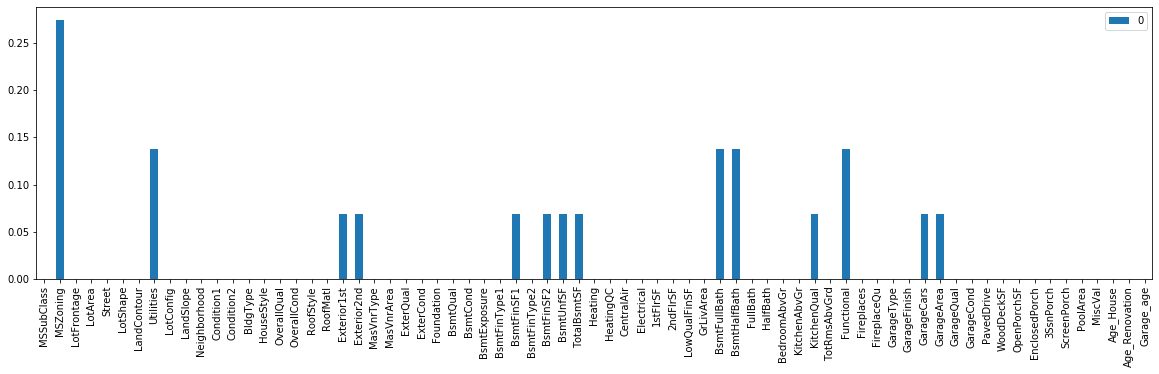

In [ ]:
pd.DataFrame(X_test.isna().sum()*100/X_test.shape[0]).plot.bar(figsize=(20,5))

In [ ]:
#construction new values to replace the missing values. 
F = X_train.MSZoning.value_counts().index[0]
G = X_train.Utilities.value_counts().index[0]
H = X_train.Exterior1st.value_counts().index[0]
I = X_train.Exterior2nd.value_counts().index[0]
J = X_train['BsmtFinSF1'].mean()
K = X_train['BsmtFinSF2'].mean()
L = X_train['TotalBsmtSF'].mean()
M = X_train.BsmtFullBath.value_counts().index[0]
N = X_train.BsmtHalfBath.value_counts().index[0]
O = X_train.KitchenQual.value_counts().index[0]
P = X_train.Functional.value_counts().index[0]
Q = int(X_train.GarageCars.value_counts().index[0])
R = X_train['GarageArea'].mean()
S = X_train['BsmtUnfSF'].mean()


In [ ]:
X_test['MSZoning']=X_test['MSZoning'].fillna(F)
X_test['Utilities']=X_test['Utilities'].fillna(G)
X_test['Exterior1st']=X_test['Exterior1st'].fillna(H)
X_test['Exterior2nd']=X_test['Exterior2nd'].fillna(I)
X_test['BsmtFinSF1']=X_test['BsmtFinSF1'].fillna(J)
X_test['BsmtFinSF2']=X_test['BsmtFinSF2'].fillna(K)
X_test['TotalBsmtSF']=X_test['TotalBsmtSF'].fillna(L)
X_test['BsmtFullBath']=X_test['BsmtFullBath'].fillna(M)
X_test['BsmtHalfBath']=X_test['BsmtHalfBath'].fillna(N)
X_test['KitchenQual']=X_test['KitchenQual'].fillna(O)
X_test['Functional']=X_test['Functional'].fillna(P)
X_test['GarageCars']=X_test['GarageCars'].fillna(Q)
X_test['GarageArea']=X_test['GarageArea'].fillna(R)
X_test['BsmtUnfSF']=X_test['BsmtUnfSF'].fillna(S)



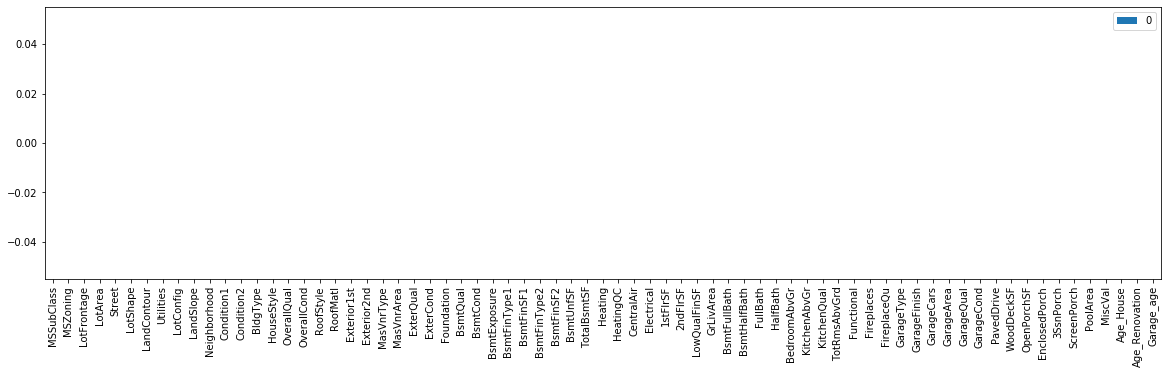

In [ ]:
pd.DataFrame(X_train.isna().sum()*100/X_train.shape[0]).plot.bar(figsize=(20,5))

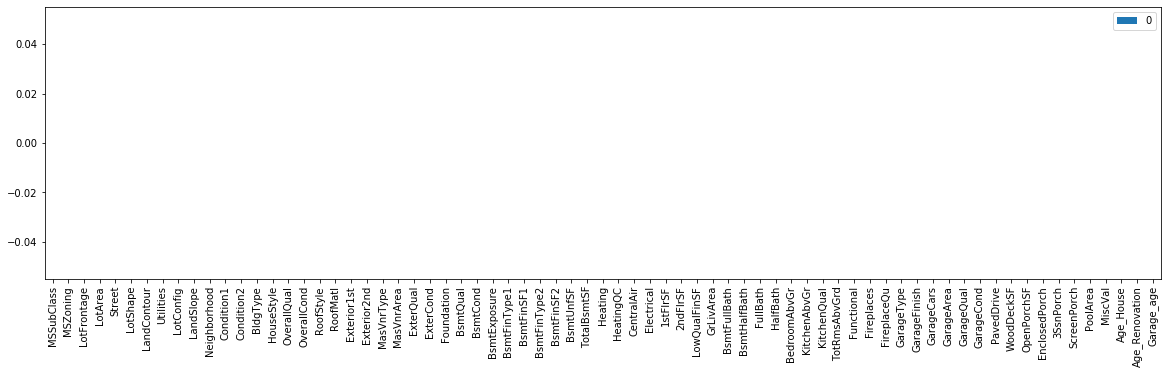

In [ ]:
pd.DataFrame(X_test.isna().sum()*100/X_test.shape[0]).plot.bar(figsize=(20,5))

In [ ]:
pd.DataFrame(X_train.isna().sum()).sum()

0    0
dtype: int64

In [ ]:
pd.DataFrame(X_train.isna().sum()).sum()

0    0
dtype: int64

#### We can see that the test/train set has no null values, we can start EDA and model training. 

# EDA

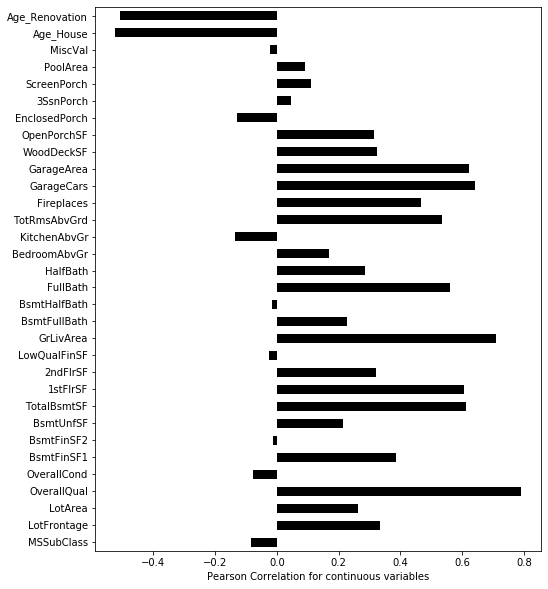

In [ ]:
result = pd.concat([X_train, Y_train], axis=1)
Corr = result.corr().iloc[:-1,-1]

fig, ax_ = plt.subplots(figsize=(8, 10))
_ =  Corr.plot(kind='barh', ax=ax_, colormap='gnuplot')
_ = ax_.set_xlabel('Pearson Correlation for continuous variables')